1. Analyze and Preprocess data - Check if the dataset has missing values or has any other problem.
2. Feature Engineering
3. Sampling Your Data
4. Build Model
    4. a. Try DecisionTree, RandomForest
    4. b. Try other tree-based model like: XGBoost, CatBoost
5. Perform model on training set and test set using gridsearch CV
6. Measure performance of the model.
7. Which metric is your main metric for this problem and why? What is your main model as well as their params and why?


How can I measure your point:
1. Your function is callable and runs correctly
2. The performance of your model (in full pipeline) is acceptable.
3. The data preprocessing is correct or make sense
4. The Feature engineering is correct or make sense
5. Any other additional process will be considered a small plus point.

Churn rate is a marketing metric that describes the number of customers who leave a business over a specific time period. Every user is assigned a prediction value that estimates their state of churn at any given time. This value is based on:

User demographic information
Browsing behavior
Historical purchase data among other information
It factors in our unique and proprietary predictions of how long a user will remain a customer. This score is updated every day for all users who have a minimum of one conversion. The values assigned are between 1 and 5.

## Load Dataset

In [1]:
!pip install -U pandas_profiling
!pip install -U pandas
!pip install -U xlrd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.9/345.9 kB 33.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 81.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 33.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 51.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.7/33.7 MB 41.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 88.5 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27096 sha256=2e099ac4473def37fce17f7ae2c97580822b4ec7c51b8

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 61.4 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ydata-profiling 4.1.2 requires pandas!=1.4.0,<1.6,>1.1, but you have pandas 2.0.1 which is incompatible.
google-colab 1.0.0 requires pandas~=1.5.3, but you have pandas 2.0.1 which is incompatible.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
!pip install streamlit-pandas-profiling

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.8/259.8 kB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 77.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 81.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.8/164.8 kB 16.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 23.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 54.1 MB/s eta 0:00:00
  Created wheel for validators: filename=validators-0.20.0-py3-none-any.whl size=19579 sha256=778a19f46a4cb619cb9314e00e734d50ca5c2ffcd0b4e7acc2625e0495bebe0d
  Stored in directory: /root/.cache/pip/wheels/f2/ed/dd/d3

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

drive.mount("/content/drive")

Mounted at /content/drive


In [5]:
import pandas_profiling

import streamlit as st

from streamlit_pandas_profiling import st_profile_report

<ipython-input-5-20b24eee64e6>:1: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling


In [56]:
import pandas as pd

PATH = "/content/HomeWork-churn_rate_prediction.csv"
df = pd.read_csv(PATH)
df.head()
#ToDo: Show histogram of dataframe

customer_id              Name  age gender  \
0      fffe4300490044003600300030003800   Pattie Morrisey   18      F   
1  fffe43004900440032003100300035003700       Traci Peery   32      F   
2      fffe4300490044003100390032003600   Merideth Mcmeen   44      F   
3  fffe43004900440036003000330031003600  Eufemia Cardwell   37      M   
4  fffe43004900440031003900350030003600      Meghan Kosak   31      F   

  security_no region_category  membership_category joining_date  \
0     XW0DQ7H         Village  Platinum Membership   2017-08-17   
1     5K0N3X1            City   Premium Membership   2017-08-28   
2     1F2TCL3            Town        No Membership   2016-11-11   
3     VJGJ33N            City        No Membership   2016-10-29   
4     SVZXCWB            City        No Membership   2017-09-12   

  joined_through_referral referral_id  ... avg_time_spent  \
0                      No    xxxxxxxx  ...         300.63   
1                       ?    CID21329  ...         306.34   
2                     Yes    CID12313  ...         516.16   
3                     Yes     CID3793  ...          53.27   
4                      No    xxxxxxxx  ...         113.13   

  avg_transaction_value avg_frequency_login_days points_in_wallet  \
0              53005.25                     17.0           781.75   
1              12838.38                     10.0              NaN   
2              21027.00                     22.0           500.69   
3              25239.56                      6.0           567.66   
4              24483.66                     16.0           663.06   

   used_special_discount  offer_application_preference  past_complaint  \
0                    Yes                           Yes              No   
1                    Yes                            No             Yes   
2                     No                           Yes             Yes   
3                     No                           Yes             Yes   
4                     No                           Yes             Yes   

      complaint_status                  feedback churn_risk_score  
0       Not Applicable  Products always in Stock                2  
1               Solved     Quality Customer Care                1  
2  Solved in Follow-up              Poor Website                5  
3             Unsolved              Poor Website                5  
4               Solved              Poor Website                5  

[5 rows x 25 columns]

In [7]:
from pandas_profiling import ProfileReport

ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## Data Analysis

In [59]:
from tables import Column
# Data analysis
# analyze  data here
categorical_cols = [feature for feature in df.columns if df[feature].dtype == "O" ]
numerical_cols = [feature for feature in df.columns if df[feature].dtype != "O" ]

df.describe()

age  days_since_last_login  avg_time_spent  \
count  36992.000000           36992.000000    36992.000000   
mean      37.118161             -41.915576      243.472334   
std       15.867412             228.819900      398.289149   
min       10.000000            -999.000000    -2814.109110   
25%       23.000000               8.000000       60.102500   
50%       37.000000              12.000000      161.765000   
75%       51.000000              16.000000      356.515000   
max       64.000000              26.000000     3235.578521   

       avg_transaction_value  points_in_wallet  churn_risk_score  
count           36992.000000      33549.000000      36992.000000  
mean            29271.194003        686.882199          3.463397  
std             19444.806226        194.063624          1.409661  
min               800.460000       -760.661236         -1.000000  
25%             14177.540000        616.150000          3.000000  
50%             27554.485000        697.620000          4.000000  
75%             40855.110000        763.950000          5.000000  
max             99914.050000       2069.069761          5.000000

## Preprocessing

In [60]:
df2 = df[df["churn_risk_score"]!=-1]

In [61]:
def preprocessing_data(df):
    """
    Preprocess your data (eg. Drop null datapoints or fill missing data)
    :param df: pandas DataFrame
    :return: pandas DataFrame
    """
    # Todo: preprocess data
    df = df.drop(columns=["customer_id","Name","security_no","joining_date","referral_id","last_visit_time","medium_of_operation","internet_option","past_complaint","complaint_status"],axis=1)
    
    df = df.replace('?',np.NaN)
    df = df.replace('Error',np.NaN)
    df = df.dropna()
    return df

In [62]:
df1 = preprocessing_data(df2.copy())
df1

age gender region_category  membership_category  \
0       18      F         Village  Platinum Membership   
2       44      F            Town        No Membership   
3       37      M            City        No Membership   
4       31      F            City        No Membership   
5       13      M            City      Gold Membership   
...    ...    ...             ...                  ...   
36984   51      M            Town      Gold Membership   
36985   12      F         Village   Premium Membership   
36986   27      M            Town  Platinum Membership   
36988   29      F            Town     Basic Membership   
36990   53      M         Village  Platinum Membership   

      joined_through_referral     preferred_offer_types  \
0                          No     Gift Vouchers/Coupons   
2                         Yes     Gift Vouchers/Coupons   
3                         Yes     Gift Vouchers/Coupons   
4                          No  Credit/Debit Card Offers   
5                          No     Gift Vouchers/Coupons   
...                       ...                       ...   
36984                      No            Without Offers   
36985                      No     Gift Vouchers/Coupons   
36986                     Yes  Credit/Debit Card Offers   
36988                      No            Without Offers   
36990                      No     Gift Vouchers/Coupons   

       days_since_last_login  avg_time_spent  avg_transaction_value  \
0                         17      300.630000               53005.25   
2                         14      516.160000               21027.00   
3                         11       53.270000               25239.56   
4                         20      113.130000               24483.66   
5                         23      433.620000               13884.77   
...                      ...             ...                    ...   
36984                     24      312.330000               63446.71   
36985                     13      418.380000               56397.21   
36986                     13      135.830000                8225.68   
36988                     13     -638.123421               11069.71   
36990                     15      482.610000                2378.86   

      avg_frequency_login_days  points_in_wallet used_special_discount  \
0                         17.0        781.750000                   Yes   
2                         22.0        500.690000                    No   
3                          6.0        567.660000                    No   
4                         16.0        663.060000                    No   
5                         24.0        722.270000                   Yes   
...                        ...               ...                   ...   
36984                      2.0        778.700000                    No   
36985                      7.0        725.890000                   Yes   
36986                     16.0        748.570000                   Yes   
36988                     28.0        527.990000                   Yes   
36990                     20.0        197.264414                   Yes   

      offer_application_preference                  feedback  churn_risk_score  
0                              Yes  Products always in Stock                 2  
2                              Yes              Poor Website                 5  
3                              Yes              Poor Website                 5  
4                              Yes              Poor Website                 5  
5                               No       No reason specified                 3  
...                            ...                       ...               ...  
36984                          Yes  Products always in Stock                 1  
36985                          Yes  Products always in Stock                 2  
36986                           No       No reason specified                 3  
36988                           No     Poor Custo

## Feature Engineering

<ipython-input-63-ab0c473cf083>:24: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df1.corr()) # Show heatmap after normalized data


<Axes: >

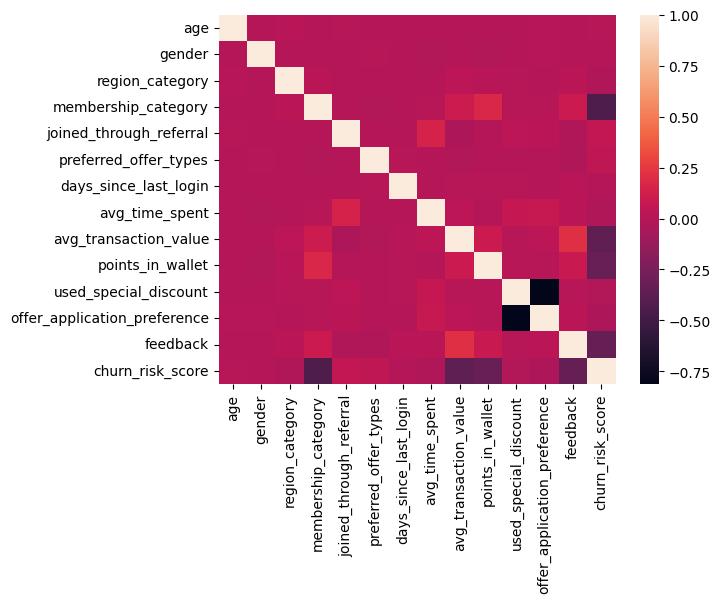

In [63]:
# Heatmap
import seaborn as sns

def apply_feature_engineering(df):
    """
    Apply all feature engineering to transform your data into number
    :param df: pandas DataFrame
    :return: pandas DataFrame
    """
    # Normalize your data
    df["gender"] = df["gender"].astype("category").cat.codes
    df["membership_category"] = df["membership_category"].astype("category").cat.codes
    df["region_category"] = df["region_category"].astype("category").cat.codes
    df["joined_through_referral"] =  df["joined_through_referral"].astype("category").cat.codes
    df["preferred_offer_types"] = df["preferred_offer_types"].astype("category").cat.codes
    df["used_special_discount"] = df["used_special_discount"].astype("category").cat.codes
    df["offer_application_preference"] = df["offer_application_preference"].astype("category").cat.codes
    df["feedback"] = df["feedback"].astype("category").cat.codes
    df.replace('?',np.NaN)
    df.dropna()
    return df

df1 = apply_feature_engineering(df1)
sns.heatmap(df1.corr()) # Show heatmap after normalized data

In [64]:
def prepare_X_y(df):
    """
    Feature engineering and create X and y
    :param df: pandas dataframe
    :return: (X, y) output feature matrix (dataframe), target (series)
    """
    # Split data into X and y (using sklearn train_test_split). Return two dataframes
    feature_names = df.columns.tolist()
    feature_names.remove("churn_risk_score")
    # Select features
    X = df[feature_names].values
     # Select label
    y =df.churn_risk_score.values
    return X, y

X, y = prepare_X_y(df1)

# Apply machine learning model

## Train-test split

In [65]:
from sklearn.model_selection import train_test_split
RANDOM_STATE = 1
TRAIN_SIZE = 0.7

trainX, testX ,trainY, testY = train_test_split(X, y, train_size=TRAIN_SIZE, random_state=RANDOM_STATE)

## Build  model

In [66]:
from sklearn.metrics import classification_report
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

def build_model(X, y):
    """
    Design your model and train it (including your best params)
    :param X: feature matrix
    :param y: target
    :return: a model
    """

    # Input your scaler and logistic model into pipeline
    model = make_pipeline(DecisionTreeClassifier())
    # fit your model with X, y
    model.fit(X,y)
    return model

def build_model2(X, y):
    """
    Design your model and train it (including your best params)
    :param X: feature matrix
    :param y: target
    :return: a model
    """

    # Input your scaler and logistic model into pipeline
    model = make_pipeline(RandomForestClassifier())
    # fit your model with X, y
    model.fit(X,y)
    return model

def calculate_performance(y_true, y_pred):
    """

    :param y_true: ground truth values
    :param y_pred: predictions
    :return:
    """
    # return your error value like accuracy, f1score, ...
    print("precision", precision_score(y_true,y_pred,average = 'weighted'))
    print("recall", recall_score(y_true,y_pred,average = 'weighted'))
    print("accuracy", accuracy_score(y_true, y_pred))
    print("F1",f1_score(y_true,y_pred,average = 'weighted') )

    # Only choose one of them as your score for the question 7
    main_score = accuracy_score(y_true, y_pred )
    return main_score

model = build_model(trainX, trainY)
# Compare on training dataset
pred = model.predict(testX)
calculate_performance(testY, pred)
print('----------------------')

model2 = build_model2(trainX,trainY)
pred2 = model2.predict(testX)
calculate_performance(testY,pred2)

precision 0.789429012694867
recall 0.7895895581066206
accuracy 0.7895895581066206
F1 0.7894160091592375
----------------------
precision 0.7863025756741129
recall 0.7889605283849662
accuracy 0.7889605283849662
F1 0.7859557158279992


0.7889605283849662

In [75]:
df3 = preprocessing_data(df.copy())


In [76]:
df3 = apply_feature_engineering(df3)

In [77]:
X2, y2 = prepare_X_y(df3)

In [78]:
from sklearn.model_selection import train_test_split
RANDOM_STATE = 1
TRAIN_SIZE = 0.7

trainX2, testX2 ,trainY2, testY2 = train_test_split(X2, y2, train_size=TRAIN_SIZE, random_state=RANDOM_STATE)

In [79]:
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder

le  = LabelEncoder()
trainY3 = le.fit_transform(trainY2)
def build_model3(X,y):
  model = XGBClassifier()
  model.fit(X,y)
  return model

print("XGB:")

model3 = build_model3(trainX2,trainY3)
pred3 = model3.predict(testX2)
calculate_performance(testY2,pred3)

XGB:
precision 0.7397397929711487
recall 0.7623250152160682
accuracy 0.7623250152160682
F1 0.7500550525701232


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.7623250152160682

In [80]:
!pip install catboost


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [81]:
import catboost as ctb

def build_model4(X,y):
  model = make_pipeline(ctb.CatBoostClassifier())
  model.fit(X,y)
  return model

print("catboost:")

model4 = build_model4(trainX,trainY)
pred4 = model4.predict(testX)
calculate_performance(testY,pred4)

catboost:
Learning rate set to 0.090794
0:	learn: 1.4477898	total: 35ms	remaining: 35s
1:	learn: 1.3134545	total: 72.7ms	remaining: 36.3s
2:	learn: 1.2012736	total: 106ms	remaining: 35.2s
3:	learn: 1.1160364	total: 128ms	remaining: 31.9s
4:	learn: 1.0405184	total: 167ms	remaining: 33.2s
5:	learn: 0.9783945	total: 199ms	remaining: 33s
6:	learn: 0.9248568	total: 244ms	remaining: 34.5s
7:	learn: 0.8769291	total: 277ms	remaining: 34.4s
8:	learn: 0.8324759	total: 313ms	remaining: 34.4s
9:	learn: 0.7983501	total: 346ms	remaining: 34.3s
10:	learn: 0.7626195	total: 378ms	remaining: 34s
11:	learn: 0.7308433	total: 413ms	remaining: 34s
12:	learn: 0.7064858	total: 450ms	remaining: 34.2s
13:	learn: 0.6799621	total: 492ms	remaining: 34.6s
14:	learn: 0.6574678	total: 528ms	remaining: 34.7s
15:	learn: 0.6358564	total: 565ms	remaining: 34.7s
16:	learn: 0.6182750	total: 595ms	remaining: 34.4s
17:	learn: 0.6029168	total: 624ms	remaining: 34.1s
18:	learn: 0.5853310	total: 657ms	remaining: 33.9s
19:	learn

0.7908476175499293

In [84]:
# -- Build a full pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier


#Build a pipeline with a scaler and a model
clf = DecisionTreeClassifier()
rfg = RandomForestClassifier()
xgb = XGBClassifier()
cb = ctb.CatBoostClassifier()
pipe = Pipeline(steps=[("tree",clf)])
pipe_2 = Pipeline(steps = [("rfg",rfg)])
pipe_3 = Pipeline(steps = [("xgb",xgb)]) 
pipe_4 = Pipeline(steps = [("cb",cb)])
 

# Parameters of pipelines can be set using '__' separated parameter names:
param_grid = {
    'tree__criterion': ["gini", "entropy", "log_loss"]
}

param_grid2  = {
    'rfg__max_features': ['log2', 'sqrt','auto']
}

param_grid3 = {
    "xgb__learning_rate":[0.1, 0.01]
}

param_grid4 = {
    'cb__learning_rate': [0.03, 0.1]
}

search = GridSearchCV(pipe, param_grid,scoring ='accuracy')
search.fit(trainX, trainY)

search2 = GridSearchCV(pipe_2,param_grid2,scoring ='accuracy')
search2.fit(trainX, trainY)

search3 = GridSearchCV(pipe_3, param_grid3,scoring="neg_log_loss")
search3.fit(trainX2,trainY3)

search4 = GridSearchCV(pipe_4,param_grid4)
search4.fit(trainX,trainY)

print("Decision tree")
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)
print('----------------------------')
print("Random forest")
print("Best parameter (CV score = %0.3f):" % search2.best_score_)
print(search2.best_params_)
print('----------------------------')
print("XGBoost")
print("Best parameter (CV score = %0.3f):" % search3.best_score_)
print(search3.best_params_)
print('----------------------------')
print("CatBoost")
print("Best parameter (CV score = %0.3f):" % search4.best_score_)
print(search4.best_params_)

from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
predicted_label = search.predict(testX)
print("Decision tree")
print(classification_report(testY, predicted_label))

print('------------------------------')

print("Random forest")
predicted_label2 = search2.predict(testX)
print(classification_report(testY,predicted_label))

print('-------------------------------')

print("XGBoost")
predicted_label3 = search3.predict(testX2)
print(classification_report(testY2,predicted_label3))

print('-------------------------------')

print("CatBoost")
predicted_label4 = search4.predict(testX)
print(classification_report(testY,predicted_label4))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Kết quả truyền trực tuyến bị cắt bớt đến 5000 dòng cuối.
72:	learn: 0.3640712	total: 1s	remaining: 12.8s
73:	learn: 0.3633563	total: 1.02s	remaining: 12.7s
74:	learn: 0.3626887	total: 1.03s	remaining: 12.7s
75:	learn: 0.3617258	total: 1.04s	remaining: 12.7s
76:	learn: 0.3606321	total: 1.05s	remaining: 12.7s
77:	learn: 0.3598562	total: 1.08s	remaining: 12.8s
78:	learn: 0.3592767	total: 1.1s	remaining: 12.8s
79:	learn: 0.3584092	total: 1.11s	remaining: 12.8s
80:	learn: 0.3577907	total: 1.12s	remaining: 12.7s
81:	learn: 0.3564544	total: 1.13s	remaining: 12.7s
82:	learn: 0.3559060	total: 1.15s	remaining: 12.7s
83:	learn: 0.3549361	total: 1.16s	remaining: 12.7s
84:	learn: 0.3543581	total: 1.17s	remaining: 12.6s
85:	learn: 0.3538477	total: 1.19s	remaining: 12.7s
86:	learn: 0.3533195	total: 1.2s	remaining: 12.6s
87:	learn: 0.3528186	total: 1.23s	remaining: 12.7s
88:	learn: 0.3520991	total: 1.24s	remaining: 12.7s
89:	learn: 0.3515342	total: 1.25s	remaining: 12.7s
90:	learn: 0.3508403	total: 1.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

In [90]:
def get_conclusion():

    # Todo: Please return your answer, conclusion and opinion right here
    
    accuracy = calculate_performance(testY,pred)
    return accuracy


conclusion = get_conclusion()
conclusion

precision 0.789429012694867
recall 0.7895895581066206
accuracy 0.7895895581066206
F1 0.7894160091592375


0.7895895581066206

Choose 'accuracy' to know how to model predict exactly